In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
def plot_data(pl, X, y):
        # plot class where y==0
    pl.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    # plot class where y==1
    pl.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    pl.legend(['0', '1'])
    return pl


In [2]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)
    
    return plt


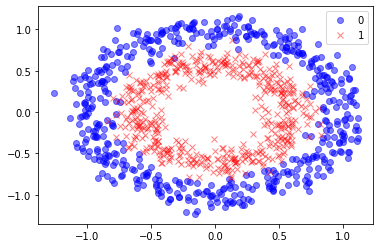

In [3]:
X, y = make_circles(n_samples=1000, factor=.6, noise=0.1, random_state=42)
pl = plot_data(plt, X, y)
pl.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [9]:
#model = Sequential()
#model.add(Dense(4, input_shape=(2,), activation="tanh", name="Hidden-1"))
#model.add(Dense(4, activation="tanh", name="Hidden-2"))
#model.add(Dense(1, activation="sigmoid", name="Output_layer"))
from keras.models import Model
from keras.layers import Input
inputs = Input(shape=(2,))
x = Dense(4, activation="tanh", name="Hidden-1")(inputs)
x = Dense(4, activation="tanh", name="Hidden-2")(x)
o = Dense(1, activation="sigmoid", name="Output_layer")(x)
model = Model(inputs=inputs, outputs=o)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
Hidden-1 (Dense)             (None, 4)                 12        
_________________________________________________________________
Hidden-2 (Dense)             (None, 4)                 20        
_________________________________________________________________
Output_layer (Dense)         (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
from keras.utils import plot_model

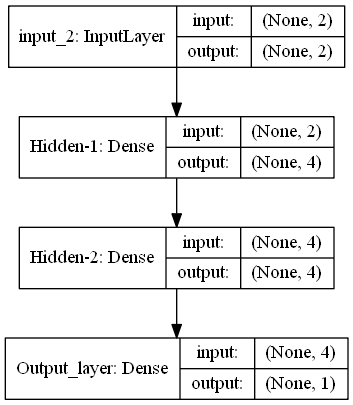

In [11]:
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [12]:
from keras.callbacks import EarlyStopping
my_callbacks = [EarlyStopping(monitor='val_acc', patience=5, mode=max)]

C:\Users\CSDT\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:788: RuntimeWarning: EarlyStopping mode <built-in function max> is unknown, fallback to auto mode.
  RuntimeWarning)


In [13]:
model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=my_callbacks, validation_data=(X_test, y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/100
700/700 [==============================] - 0s 178us/step - loss: 0.6986 - accuracy: 0.4886 - val_loss: 0.6882 - val_accuracy: 0.4333
Epoch 2/100
700/700 [==============================] - 0s 22us/step - loss: 0.6764 - accuracy: 0.5829 - val_loss: 0.6652 - val_accuracy: 0.5700
Epoch 3/100
700/700 [==============================] - 0s 45us/step - loss: 0.6403 - accuracy: 0.6571 - val_loss: 0.6450 - val_accuracy: 0.7067
Epoch 4/100
700/700 [==============================] - 0s 22us/step - loss: 0.6064 - accuracy: 0.7043 - val_loss: 0.6282 - val_accuracy: 0.6833
Epoch 5/100
700/700 [==============================] - 0s 22us/step - loss: 0.5714 - accuracy: 0.7286 - val_loss: 0.5788 - val_accuracy: 0.7200
Epoch 6/100
700/700 [==============================] - 0s 22us/step - loss: 0.5442 - accuracy: 0.7429 - val_loss: 0.5376 - val_accuracy: 0.7267
Epoch 7/100
700/700 [==============================] - 0s 45us/step - loss: 0.4381 - accu

C:\Users\CSDT\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 9/100
700/700 [==============================] - 0s 45us/step - loss: 0.2766 - accuracy: 0.9071 - val_loss: 0.3887 - val_accuracy: 0.8533
Epoch 10/100
700/700 [==============================] - 0s 22us/step - loss: 0.2490 - accuracy: 0.9143 - val_loss: 0.3260 - val_accuracy: 0.8633
Epoch 11/100
700/700 [==============================] - 0s 45us/step - loss: 0.2284 - accuracy: 0.9300 - val_loss: 0.2392 - val_accuracy: 0.9067
Epoch 12/100
700/700 [==============================] - 0s 45us/step - loss: 0.1765 - accuracy: 0.9486 - val_loss: 0.2430 - val_accuracy: 0.9200
Epoch 13/100
700/700 [==============================] - 0s 22us/step - loss: 0.1460 - accuracy: 0.9600 - val_loss: 0.2063 - val_accuracy: 0.9100
Epoch 14/100
700/700 [==============================] - 0s 45us/step - loss: 0.1503 - accuracy: 0.9500 - val_loss: 0.2139 - val_accuracy: 0.9067
Epoch 15/100
700/700 [==============================] - 0s 45us/step - loss: 0.1206 - accuracy: 0.9614 - val_loss: 0.2287 - val_acc

700/700 [==============================] - 0s 45us/step - loss: 0.0616 - accuracy: 0.9786 - val_loss: 0.1463 - val_accuracy: 0.9467
Epoch 66/100
700/700 [==============================] - 0s 45us/step - loss: 0.0611 - accuracy: 0.9729 - val_loss: 0.1517 - val_accuracy: 0.9500
Epoch 67/100
700/700 [==============================] - 0s 22us/step - loss: 0.0615 - accuracy: 0.9771 - val_loss: 0.1312 - val_accuracy: 0.9467
Epoch 68/100
700/700 [==============================] - 0s 45us/step - loss: 0.0599 - accuracy: 0.9771 - val_loss: 0.1502 - val_accuracy: 0.9433
Epoch 69/100
700/700 [==============================] - 0s 22us/step - loss: 0.0569 - accuracy: 0.9857 - val_loss: 0.1294 - val_accuracy: 0.9500
Epoch 70/100
700/700 [==============================] - 0s 45us/step - loss: 0.0555 - accuracy: 0.9814 - val_loss: 0.1639 - val_accuracy: 0.9300
Epoch 71/100
700/700 [==============================] - 0s 22us/step - loss: 0.0863 - accuracy: 0.9671 - val_loss: 0.1880 - val_accuracy: 0.916

In [14]:
eval_result = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 52us/step


In [15]:
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 0.14927741790811222 Test accuracy: 0.9366666674613953


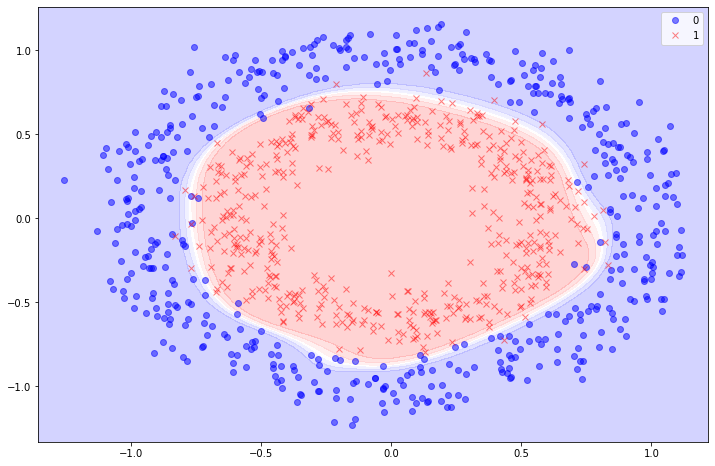

In [16]:
plot_decision_boundary(model, X, y).show()